In [3]:
import os

os.chdir("/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code")

# Plotting heatmaps

- find the best lambda, beta_gm, len_memory

(for both fractional memory versions)
- plot 3 heatmaps for 
    - all heatmaps have iterations as color intensity
        - x-axis, y-axis parameters:
            - lambda vs beta_gm (fixed memory len at 10)
            - lambda vs len_memory  (fixed memory weight at 0.02)
            - beta_gm vs len_memory  (fixed lambda at 0.5)
    - ill-conditioned Hessian: do it on the sum of initial conditions
    - Rosenbrock: do it starting at (0,0)

- take the best parameters you find


In [56]:
from comdo.utils import *
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns


In [7]:
def save_list_to_file(lst, filename):
    with open(filename, 'wb') as f:
        pickle.dump(lst, f)

def load_list_from_file(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)
    
dicts_Summed_preformances_fractional_v1 = load_list_from_file('/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code/dicts_Summed_preformances_fractional_v1.pkl')
dicts_Summed_preformances_fractional_v2 = load_list_from_file('/home/andrei/Desktop/PROJECT_ELLIS_COMDO/FOLDER_code/dicts_Summed_preformances_fractional_v2.pkl')

print(dicts_Summed_preformances_fractional_v1)
print(dicts_Summed_preformances_fractional_v2)

[{((1.0, 0.0), 'fractional_v1', 0.01, 1, 0.1, 0, 0.2, 0): 2225}, {((1.0, 0.0), 'fractional_v1', 0.01, 1, 0.1, 0, 0.2, 0.002): 2203}, {((1.0, 0.0), 'fractional_v1', 0.01, 1, 0.1, 0, 0.2, 0.02): 2022}, {((1.0, 0.0), 'fractional_v1', 0.01, 1, 0.1, 0, 0.2, 0.04): 1854}, {((1.0, 0.0), 'fractional_v1', 0.01, 1, 0.1, 0, 0.2, 0.1): 1489}, {((1.0, 0.0), 'fractional_v1', 0.01, 1, 0.1, 0, 0.2, 0.2): 1157}, {((1.0, 0.0), 'fractional_v1', 0.01, 2, 0.1, 0, 0.2, 0.002): 2209}, {((1.0, 0.0), 'fractional_v1', 0.15, 2, 0.1, 0, 0.2, 0.002): 2210}, {((1.0, 0.0), 'fractional_v1', 0.3, 2, 0.1, 0, 0.2, 0.002): 2210}, {((1.0, 0.0), 'fractional_v1', 0.6, 2, 0.1, 0, 0.2, 0.002): 2213}, {((1.0, 0.0), 'fractional_v1', 0.9, 2, 0.1, 0, 0.2, 0.002): 2213}, {((1.0, 0.0), 'fractional_v1', 0.01, 5, 0.1, 0, 0.2, 0.002): 2216}, {((1.0, 0.0), 'fractional_v1', 0.15, 5, 0.1, 0, 0.2, 0.002): 2216}, {((1.0, 0.0), 'fractional_v1', 0.3, 5, 0.1, 0, 0.2, 0.002): 2217}, {((1.0, 0.0), 'fractional_v1', 0.6, 5, 0.1, 0, 0.2, 0.002): 2

## Plotting for v1

### First heatmap
- lambda vs beta_gm
    - fixed memory_len = 10 

In [14]:
import seaborn as sns

In [22]:

x_values = []
y_values = []
intensity_values = []


for d in dicts_Summed_preformances_fractional_v1:
    key = list(d.keys())[0]
    if key[3] == 10:
        x_values.append(key[2])
        y_values.append(key[7])
        intensity_values.append(list(d.values())[0])

print("x values", x_values)
print("y values: ", y_values)

x_values = np.sort( np.unique(x_values))
y_values = np.sort( np.unique(y_values))

print("unique and sorted x", (x_values))
print("unique and sorted y", (y_values))

x values [0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9]
y values:  [0.002, 0.002, 0.002, 0.002, 0.002, 0.02, 0.02, 0.02, 0.02, 0.02, 0.04, 0.04, 0.04, 0.04, 0.04, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2]
unique and sorted x [0.01 0.15 0.3  0.6  0.9 ]
unique and sorted y [0.002 0.02  0.04  0.1   0.2  ]


In [33]:
print(dicts_Summed_preformances_fractional_v1)

print(next(iter(dicts_Summed_preformances_fractional_v1)))
print(next(iter(dicts_Summed_preformances_fractional_v1)))

[{((1.0, 0.0), 'fractional_v1', 0.01, 1, 0.1, 0, 0.2, 0): 2225}, {((1.0, 0.0), 'fractional_v1', 0.01, 1, 0.1, 0, 0.2, 0.002): 2203}, {((1.0, 0.0), 'fractional_v1', 0.01, 1, 0.1, 0, 0.2, 0.02): 2022}, {((1.0, 0.0), 'fractional_v1', 0.01, 1, 0.1, 0, 0.2, 0.04): 1854}, {((1.0, 0.0), 'fractional_v1', 0.01, 1, 0.1, 0, 0.2, 0.1): 1489}, {((1.0, 0.0), 'fractional_v1', 0.01, 1, 0.1, 0, 0.2, 0.2): 1157}, {((1.0, 0.0), 'fractional_v1', 0.01, 2, 0.1, 0, 0.2, 0.002): 2209}, {((1.0, 0.0), 'fractional_v1', 0.15, 2, 0.1, 0, 0.2, 0.002): 2210}, {((1.0, 0.0), 'fractional_v1', 0.3, 2, 0.1, 0, 0.2, 0.002): 2210}, {((1.0, 0.0), 'fractional_v1', 0.6, 2, 0.1, 0, 0.2, 0.002): 2213}, {((1.0, 0.0), 'fractional_v1', 0.9, 2, 0.1, 0, 0.2, 0.002): 2213}, {((1.0, 0.0), 'fractional_v1', 0.01, 5, 0.1, 0, 0.2, 0.002): 2216}, {((1.0, 0.0), 'fractional_v1', 0.15, 5, 0.1, 0, 0.2, 0.002): 2216}, {((1.0, 0.0), 'fractional_v1', 0.3, 5, 0.1, 0, 0.2, 0.002): 2217}, {((1.0, 0.0), 'fractional_v1', 0.6, 5, 0.1, 0, 0.2, 0.002): 2

In [52]:
d = dicts_Summed_preformances_fractional_v1

print(list(d[0].values())[0])

key = list(d[0].keys())[0]
print("key: ", key)

print(key[7])


2225
key:  ((1.0, 0.0), 'fractional_v1', 0.01, 1, 0.1, 0, 0.2, 0)
0


x values [0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9]
y values:  [0.002, 0.002, 0.002, 0.002, 0.002, 0.02, 0.02, 0.02, 0.02, 0.02, 0.04, 0.04, 0.04, 0.04, 0.04, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2]
unique and sorted x [0.01 0.15 0.3  0.6  0.9 ]
unique and sorted y [0.002 0.02  0.04  0.1   0.2  ]


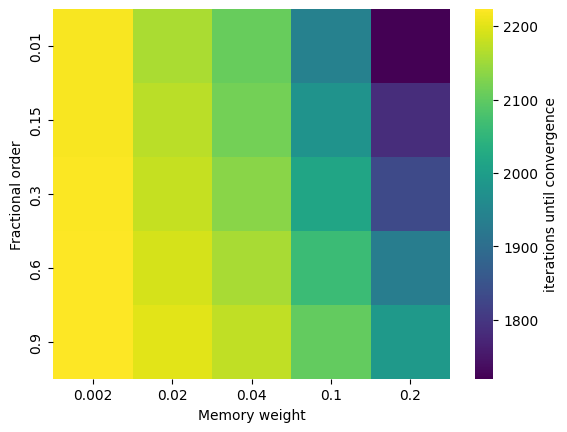

x values [0.01, 0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9]
y values:  [1, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 100, 100, 100, 100, 100]
unique and sorted x [0.01 0.15 0.3  0.6  0.9 ]
unique and sorted y [  1   2   5  10 100]


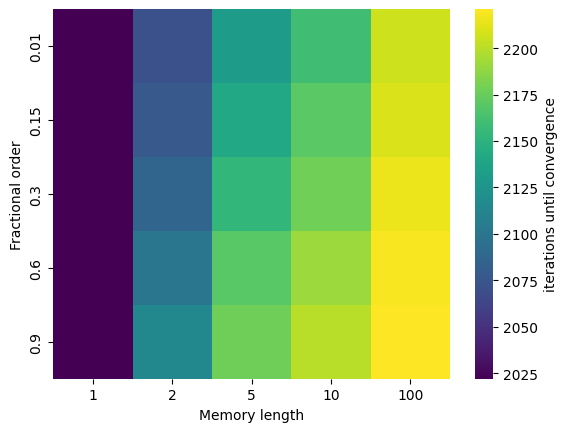

x values [2, 5, 10, 100, 2, 5, 10, 100, 2, 5, 10, 100, 2, 5, 10, 100, 2, 5, 10, 100]
y values:  [0.002, 0.002, 0.002, 0.002, 0.02, 0.02, 0.02, 0.02, 0.04, 0.04, 0.04, 0.04, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2]
unique and sorted x [  2   5  10 100]
unique and sorted y [0.002 0.02  0.04  0.1   0.2  ]


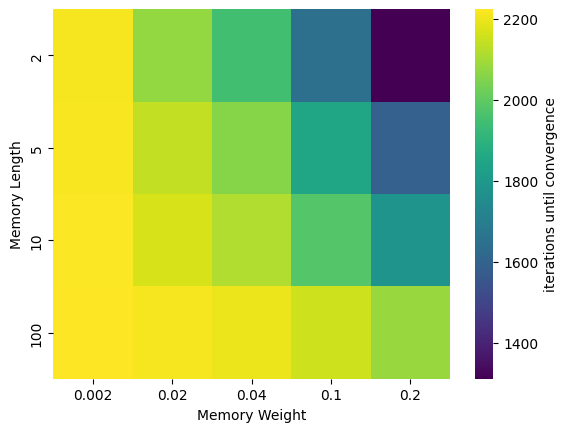

In [90]:




#------------------grid_LambdaVSMemoryWeight-------------------------------



x_values = []
y_values = []
intensity_values = []


for d in dicts_Summed_preformances_fractional_v1:
    key = list(d.keys())[0]
    if key[3] == 10:
        x_values.append(key[2])
        y_values.append(key[7])

print("x values", x_values)
print("y values: ", y_values)

x_values = np.sort( np.unique(x_values))
y_values = np.sort( np.unique(y_values))

print("unique and sorted x", (x_values))
print("unique and sorted y", (y_values))

grid_LambdaVSMemoryWeight = np.zeros((len(x_values), len(y_values)))

for i in range(len(x_values)):
    for j in range(len(y_values)):
        for d in dicts_Summed_preformances_fractional_v1:

            key = list(d.keys())[0]
            if key[3] == 10 and key[2] == x_values[i] and key[7] == y_values[j]:
                grid_LambdaVSMemoryWeight[i, j] = (list(d.values())[0])


ax = sns.heatmap(data=grid_LambdaVSMemoryWeight, xticklabels=y_values, yticklabels=x_values, cmap='viridis', label = "iterations until convergence")
colorbar = ax.collections[0].colorbar
colorbar.set_label("iterations until convergence")
plt.ylabel("Fractional order")
plt.xlabel("Memory weight")
plt.show()


#------------------grid_LambdaVSMemoryLength (fixed-------------------------------

x_values = []
y_values = []
intensity_values = []


for d in dicts_Summed_preformances_fractional_v1:
    key = list(d.keys())[0]
    if key[7] == 0.02:
        x_values.append(key[2])
        y_values.append(key[3])

print("x values", x_values)
print("y values: ", y_values)

x_values = np.sort( np.unique(x_values))
y_values = np.sort( np.unique(y_values))

print("unique and sorted x", (x_values))
print("unique and sorted y", (y_values))


grid_LambdaVSMemoryLength = np.zeros((len(x_values), len(y_values)))

for i in range(len(x_values)):
    for j in range(len(y_values)):
        for d in dicts_Summed_preformances_fractional_v1:

            key = list(d.keys())[0]
            if key[7] == 0.02 and key[2] == x_values[i] and key[3] == y_values[j]:
                grid_LambdaVSMemoryLength[i, j] = (list(d.values())[0])

for i in range(len(x_values)):
    for j in range(len(y_values)):

        if  i!=0 and j == 0:
            grid_LambdaVSMemoryLength[i, j] = grid_LambdaVSMemoryLength[0, 0]


ax = sns.heatmap(data=grid_LambdaVSMemoryLength, xticklabels=y_values, yticklabels= x_values, cmap='viridis', label = "iterations until convergence")
colorbar = ax.collections[0].colorbar
colorbar.set_label("iterations until convergence")
plt.ylabel("Fractional order")
plt.xlabel("Memory length")
plt.show()








#------------------beta_gm vs len_memory  (fixed lambda at 0.15)-------------------------------



x_values = []
y_values = []
intensity_values = []


for d in dicts_Summed_preformances_fractional_v1:
    key = list(d.keys())[0]
    if key[2] == 0.15:
        x_values.append(key[3])
        y_values.append(key[7])

print("x values", x_values)
print("y values: ", y_values)

x_values = np.sort( np.unique(x_values))
y_values = np.sort( np.unique(y_values))

print("unique and sorted x", (x_values))
print("unique and sorted y", (y_values))

grid_MemoryLengthVSMemoryWeight = np.zeros((len(x_values), len(y_values)))

for i in range(len(x_values)):
    for j in range(len(y_values)):
        for d in dicts_Summed_preformances_fractional_v1:

            key = list(d.keys())[0]
            if key[2] == 0.15 and key[3] == x_values[i] and key[7] == y_values[j]:
                grid_MemoryLengthVSMemoryWeight[i, j] = (list(d.values())[0])


ax = sns.heatmap(data=grid_MemoryLengthVSMemoryWeight, xticklabels=y_values, yticklabels=x_values, cmap='viridis', label = "iterations until convergence")
colorbar = ax.collections[0].colorbar
colorbar.set_label("iterations until convergence")
plt.ylabel("Memory Length")
plt.xlabel("Memory Weight")
plt.show()



## Now for version 2

x values [0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9]
y values:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002, 0, 0.002, 0, 0.002, 0, 0.002, 0, 0.002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.02, 0, 0.02, 0, 0.02, 0, 0.02, 0, 0.02, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.04, 0, 0.04, 0, 0.04, 0, 0.04, 0, 0.04, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0.2, 0, 0.2, 0, 0.2, 0, 0.2, 0, 0, 0, 0, 0, 0]
unique and sorted x [0.01 0.15 0.3  0.6  0.9 ]
unique and sorted y [0.    0.002 0.02  0.04  0.1   0.2  ]


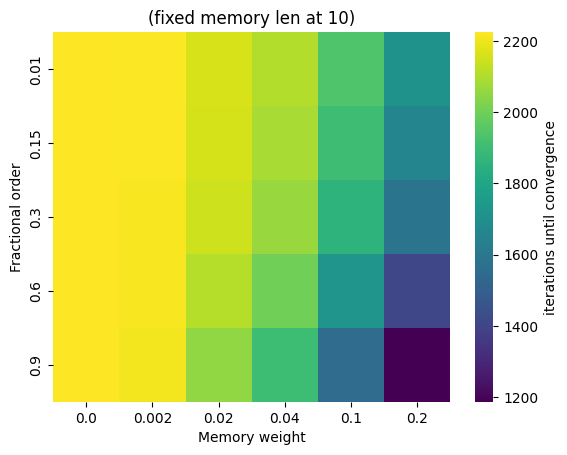

x values [0.01, 0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9, 0.01, 0.15, 0.3, 0.6, 0.9]
y values:  [1, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 100, 100, 100, 100, 100]
unique and sorted x [0.01 0.15 0.3  0.6  0.9 ]
unique and sorted y [  1   2   5  10 100]


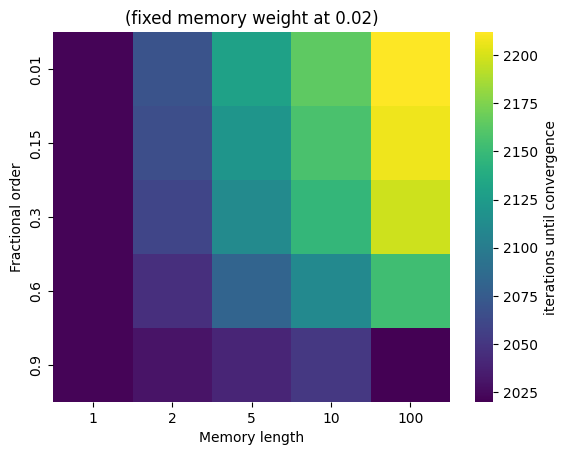

x values [2, 5, 10, 100, 2, 5, 10, 100, 2, 5, 10, 100, 2, 5, 10, 100, 2, 5, 10, 100]
y values:  [0, 0, 0, 0, 0, 0, 0, 0.002, 0, 0, 0, 0, 0, 0.002, 0, 0, 0, 0, 0, 0.002, 0, 0, 0, 0, 0, 0.002, 0, 0, 0, 0, 0, 0.02, 0, 0, 0, 0, 0, 0.02, 0, 0, 0, 0, 0, 0.02, 0, 0, 0, 0, 0, 0.02, 0, 0, 0, 0, 0, 0.04, 0, 0, 0, 0, 0, 0.04, 0, 0, 0, 0, 0, 0.04, 0, 0, 0, 0, 0, 0.04, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0]
unique and sorted x [  2   5  10 100]
unique and sorted y [0.    0.002 0.02  0.04  0.1   0.2  ]


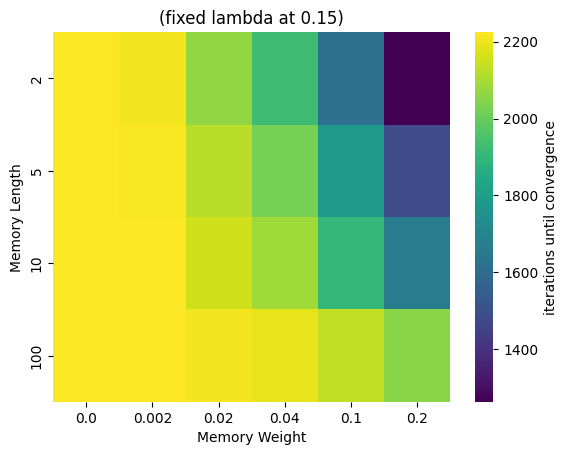

x values [1, 1, 1, 1, 1, 1, 2, 5, 10, 100, 2, 5, 10, 100, 2, 5, 10, 100, 2, 5, 10, 100, 2, 5, 10, 100]
y values:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002, 0, 0, 0, 0, 0, 0.002, 0, 0, 0, 0, 0, 0.002, 0, 0, 0, 0, 0, 0.002, 0, 0, 0, 0, 0, 0.02, 0, 0, 0, 0, 0, 0.02, 0, 0, 0, 0, 0, 0.02, 0, 0, 0, 0, 0, 0.02, 0, 0, 0, 0, 0, 0.04, 0, 0, 0, 0, 0, 0.04, 0, 0, 0, 0, 0, 0.04, 0, 0, 0, 0, 0, 0.04, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0.2, 0]
unique and sorted x [  1   2   5  10 100]
unique and sorted y [0.    0.002 0.02  0.04  0.1   0.2  ]


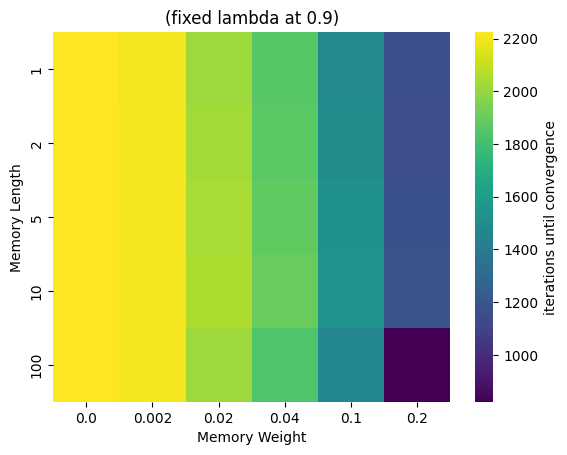

In [118]:


# value of no memory = 2225
no_memory = 2225



#------------------grid_LambdaVSMemoryWeight (fixed memory len at 10)-------------------------------



x_values = []
y_values = []
intensity_values = []


for d in dicts_Summed_preformances_fractional_v2:
    key = list(d.keys())[0]
    if key[3] == 10:
        x_values.append(key[2])
        y_values.append(key[7])
    y_values.append(0)


print("x values", x_values)
print("y values: ", y_values)

x_values = np.sort( np.unique(x_values))
y_values = np.sort( np.unique(y_values))

print("unique and sorted x", (x_values))
print("unique and sorted y", (y_values))

grid_LambdaVSMemoryWeight = np.zeros((len(x_values), len(y_values)))

for i in range(len(x_values)):
    for j in range(len(y_values)):
        for d in dicts_Summed_preformances_fractional_v2:

            key = list(d.keys())[0]
            if key[3] == 10 and key[2] == x_values[i] and key[7] == y_values[j]:
                grid_LambdaVSMemoryWeight[i, j] = (list(d.values())[0])
            
            if j == 0:
                grid_LambdaVSMemoryWeight[i, j] = no_memory


ax = sns.heatmap(data=grid_LambdaVSMemoryWeight, xticklabels=y_values, yticklabels=x_values, cmap='viridis', label = "iterations until convergence")
colorbar = ax.collections[0].colorbar
colorbar.set_label("iterations until convergence")
plt.ylabel("Fractional order")
plt.xlabel("Memory weight")
plt.title("(fixed memory len at 10)")
plt.show()


#------------------grid_LambdaVSMemoryLength (fixed memory weight at 0.02) -------------------------------

x_values = []
y_values = []
intensity_values = []


for d in dicts_Summed_preformances_fractional_v2:
    key = list(d.keys())[0]
    if key[7] == 0.02:
        x_values.append(key[2])
        y_values.append(key[3])

print("x values", x_values)
print("y values: ", y_values)

x_values = np.sort( np.unique(x_values))
y_values = np.sort( np.unique(y_values))

print("unique and sorted x", (x_values))
print("unique and sorted y", (y_values))


grid_LambdaVSMemoryLength = np.zeros((len(x_values), len(y_values)))

for i in range(len(x_values)):
    for j in range(len(y_values)):
        for d in dicts_Summed_preformances_fractional_v2:

            key = list(d.keys())[0]
            if key[7] == 0.02 and key[2] == x_values[i] and key[3] == y_values[j]:
                grid_LambdaVSMemoryLength[i, j] = (list(d.values())[0])

for i in range(len(x_values)):
    for j in range(len(y_values)):

        if  i!=0 and j == 0:
            grid_LambdaVSMemoryLength[i, j] = grid_LambdaVSMemoryLength[0, 0]


ax = sns.heatmap(data=grid_LambdaVSMemoryLength, xticklabels=y_values, yticklabels= x_values, cmap='viridis', label = "iterations until convergence")
colorbar = ax.collections[0].colorbar
colorbar.set_label("iterations until convergence")
plt.ylabel("Fractional order")
plt.xlabel("Memory length")
plt.title("(fixed memory weight at 0.02)")
plt.show()








#------------------beta_gm vs len_memory  (fixed lambda at 0.15)-------------------------------



x_values = []
y_values = []
intensity_values = []


for d in dicts_Summed_preformances_fractional_v2:
    key = list(d.keys())[0]
    if key[2] == 0.15:
        x_values.append(key[3])
        y_values.append(key[7])
    y_values.append(0)


print("x values", x_values)
print("y values: ", y_values)

x_values = np.sort( np.unique(x_values))
y_values = np.sort( np.unique(y_values))

print("unique and sorted x", (x_values))
print("unique and sorted y", (y_values))

grid_MemoryLengthVSMemoryWeight = np.zeros((len(x_values), len(y_values)))

for i in range(len(x_values)):
    for j in range(len(y_values)):
        for d in dicts_Summed_preformances_fractional_v2:

            key = list(d.keys())[0]
            if key[2] == 0.15 and key[3] == x_values[i] and key[7] == y_values[j]:
                grid_MemoryLengthVSMemoryWeight[i, j] = (list(d.values())[0])

            if y_values[j] == 0:
                grid_MemoryLengthVSMemoryWeight[i, j] = no_memory

ax = sns.heatmap(data=grid_MemoryLengthVSMemoryWeight, xticklabels=y_values, yticklabels=x_values, cmap='viridis', label = "iterations until convergence")
colorbar = ax.collections[0].colorbar
colorbar.set_label("iterations until convergence")
plt.title("(fixed lambda at 0.15)")
plt.ylabel("Memory Length")
plt.xlabel("Memory Weight")
plt.show()


#------------------ beta_gm vs len_memory  (fixed lambda at 0.9)-------------------------------



x_values = []
y_values = []
intensity_values = []


for d in dicts_Summed_preformances_fractional_v2:
    key = list(d.keys())[0]
    if key[2] == 0.9:
        y_values.append(key[7])
    y_values.append(0)

    if key[2] == 0.9 or key[3] == 1:
        x_values.append(key[3])



print("x values", x_values)
print("y values: ", y_values)

x_values = np.sort( np.unique(x_values))
y_values = np.sort( np.unique(y_values))

print("unique and sorted x", (x_values))
print("unique and sorted y", (y_values))

grid_MemoryLengthVSMemoryWeight = np.zeros((len(x_values), len(y_values)))

for i in range(len(x_values)):
    for j in range(len(y_values)):
        for d in dicts_Summed_preformances_fractional_v2:

            key = list(d.keys())[0]
            if key[2] == 0.9 and key[3] == x_values[i] and key[7] == y_values[j]:
                grid_MemoryLengthVSMemoryWeight[i, j] = (list(d.values())[0])

            # Adding memory length of 1 and memory weight of 0
            if key[3] == x_values[i] and key[3] == 1 and key[7] == y_values[j]:
                grid_MemoryLengthVSMemoryWeight[i, j] = (list(d.values())[0])
            
            if j==0:
                grid_MemoryLengthVSMemoryWeight[i, j] = no_memory

ax = sns.heatmap(data=grid_MemoryLengthVSMemoryWeight, xticklabels=y_values, yticklabels=x_values, cmap='viridis', label = "iterations until convergence")
colorbar = ax.collections[0].colorbar
colorbar.set_label("iterations until convergence")
plt.title("(fixed lambda at 0.9)")
plt.ylabel("Memory Length")
plt.xlabel("Memory Weight")
plt.show()


## Something funky going on at lambda= 0.9 and memory = 100

In [116]:
grid_LambdaVSMemoryLength

array([[2022., 2069., 2130., 2164., 2212.],
       [2022., 2065., 2120., 2157., 2207.],
       [2022., 2059., 2111., 2147., 2197.],
       [2022., 2046., 2081., 2110., 2153.],
       [2022., 2030., 2040., 2051., 2020.]])

when memory_weight fixed at 0.02, **fractional profile of 0.9 better by 2 iterations** than heavy ball, yay!

In [117]:
grid_MemoryLengthVSMemoryWeight

array([[2225., 2203., 2022., 1854., 1489., 1157.],
       [2225., 2204., 2030., 1865., 1505., 1156.],
       [2225., 2205., 2040., 1884., 1529., 1170.],
       [2225., 2206., 2051., 1900., 1548., 1187.],
       [2225., 2204., 2020., 1837., 1468.,  822.]])

across memory memory weights , **fractional profile of 0.9 superior to heavy ball across the board, even by 300 iterations for high weight!**

(except for weight of 0.002, when it's slower by 1 iteration)

In [99]:
for d in dicts_Summed_preformances_fractional_v2:

    key = list(d.keys())[0]
    if key[7] == 0:
        print(d[key])
        

2225


## Add memory weight == 0 and memory length = 1 to all plots!

In [76]:
print(grid_LambdaVSMemoryLength)

[[2022. 2071. 2131. 2160. 2206.]
 [2022. 2077. 2141. 2170. 2210.]
 [2022. 2086. 2153. 2178. 2215.]
 [2022. 2100. 2169. 2191. 2219.]
 [2022. 2115. 2177. 2200. 2221.]]


In [54]:
print(grid)

[[2219. 2160. 2107. 1940. 1720.]
 [2219. 2170. 2116. 1979. 1784.]
 [2221. 2178. 2133. 2016. 1833.]
 [2222. 2191. 2157. 2062. 1932.]
 [2223. 2200. 2174. 2102. 1990.]]
